# Work with gensim Word2 vec

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import gensim

%matplotlib inline


In [6]:
print(gensim.__version__)


4.3.0


In [9]:
df = pd.read_csv('supply_chain_text_prep_06_06.csv', sep=',')

df.head()

,Product Name,Brand Name,Price,Stars,Text,Review Votes,AverageRating,ReviewsNumber,Sentiment,Review length,Word count,emoji
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,feel lucky found used phone us used hard phone...,1.0,3.702703,37,Positive,374,72,[]
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,3.702703,37,Positive,214,40,[]
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,pleased,0.0,3.702703,37,Positive,12,2,[]
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,works good goes slow sometimes good phone love,0.0,3.702703,37,Positive,76,17,[]
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,great phone replace lost phone thing volume bu...,0.0,3.702703,37,Positive,223,43,[]


In [10]:
df.info()
#we have some NaN in review text, appeared after preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326799 entries, 0 to 326798
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Product Name   326799 non-null  object 
 1   Brand Name     326799 non-null  object 
 2   Price          321825 non-null  float64
 3   Stars          326799 non-null  int64  
 4   Text           326054 non-null  object 
 5   Review Votes   326799 non-null  float64
 6   AverageRating  326799 non-null  float64
 7   ReviewsNumber  326799 non-null  int64  
 8   Sentiment      326799 non-null  object 
 9   Review length  326799 non-null  int64  
 10  Word count     326799 non-null  int64  
 11  emoji          326799 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 29.9+ MB


In [11]:
df.dropna(subset = ['Text'], inplace=True)


#text preprocessing created some NaNs in Text, and we remove them

In [12]:

model = gensim.models.Word2Vec(window=10, 
                               min_count=5, 
                               workers=4, 
                               alpha=0.01,
                               negative=20,
                               sample=0.0001)
# min_count :int - Ignores all words with total absolute frequency lower than this - (2, 100)
# window: = int - The maximum distance between the current and predicted word within a sentence
# alpha = float - The initial learning rate - (0.01, 0.05)
#negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" 
     #should be drown. If set to 0, no negative sampling is used. 
#workers = int - Use these many worker threads to train the model (=faster training with multicore machines)
#sample = float - The threshold for configuring which higher-frequency words 
           #are randomly downsampled. Highly influencial. - (0, 1e-5)

review_text = df['Text'].apply(gensim.utils.simple_preprocess)
model.build_vocab(review_text, progress_per=10000)
model.train(review_text, total_examples=model.corpus_count, epochs=50, report_delay=1)

(185016709, 348562950)

In [13]:
print(model)

Word2Vec<vocab=26139, vector_size=100, alpha=0.01>


In [14]:
model.wv.most_similar("plastic")

[('aluminum', 0.7883279919624329),
 ('material', 0.7672010064125061),
 ('metal', 0.7624526023864746),
 ('rubber', 0.7166784405708313),
 ('casing', 0.7063425183296204),
 ('cover', 0.7047712206840515),
 ('flimsy', 0.698757529258728),
 ('covering', 0.6749110817909241),
 ('body', 0.6646881103515625),
 ('sides', 0.6636676788330078)]

[2.91011554e-01 1.51441023e-01 1.25158234e-01 9.35567302e-02
 7.31281006e-02 5.98531411e-02 5.54724490e-02 4.14307796e-02
 3.51455089e-02 2.77659855e-02 2.24075471e-02 1.55196498e-02
 8.10929670e-03 2.41680456e-32 8.71467553e-33 6.17648551e-33
 3.43796802e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33
 1.81317040e-33 1.81317040e-33 1.81317040e-33 1.81317040e-33]


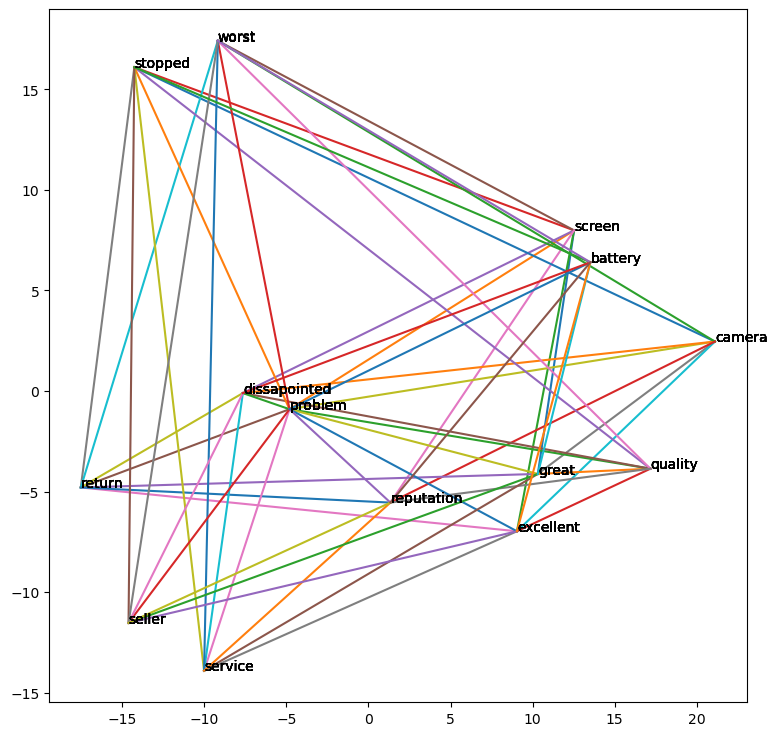

In [15]:
#some visualization
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pairs = [('screen', 'great'),
('screen', 'problem'),
('screen', 'excellent'),
('screen', 'stopped'),
('screen', 'dissapointed'),
('screen', 'worst'),        
('screen', 'reputation'),
('camera', 'great'),         
('camera', 'problem'),
('camera', 'excellent'),
('camera', 'stopped'),
('camera', 'dissapointed'),
('camera', 'worst'),
('camera', 'reputation'),
('return', 'great'),         
('return', 'problem'),
('return', 'excellent'),
('return', 'stopped'),
('return', 'dissapointed'),
('return', 'worst'),
('return', 'reputation'),         
('quality', 'great'),         
('quality', 'problem'),
('quality', 'excellent'),
('quality', 'stopped'),
('quality', 'dissapointed'),
('quality', 'worst'),
('quality', 'reputation'),         
('problem', 'great'),         
('problem', 'problem'),
('problem', 'excellent'),
('problem', 'stopped'),
('problem', 'dissapointed'),
('problem', 'worst'),
('problem', 'reputation'),         
('service', 'great'),         
('service', 'problem'),
('service', 'excellent'),
('service', 'stopped'),
('service', 'dissapointed'),
('service', 'worst'),
('service', 'reputation'),         
('seller', 'great'),         
('seller', 'problem'),
('seller', 'excellent'),
('seller', 'stopped'),
('seller', 'dissapointed'),
('seller', 'worst'),
('seller', 'reputation'),           
('battery', 'great'),         
('battery', 'problem'),
('battery', 'excellent'),
('battery', 'stopped'),
('battery', 'dissapointed'),
('battery', 'worst'),
('battery', 'reputation')]      
n = np.shape(pairs)[0]

difference_matrix = np.array([model.wv.get_vector(a[0])-model.wv.get_vector(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model.wv.get_vector(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(9,9))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show();


In [16]:
#some visualization of Word2Vec
df_apple=df.loc[df['Brand Name']=='APPLE']

model_apple= gensim.models.Word2Vec(window=10, 
                               min_count=5, 
                               workers=4, 
                               alpha=0.01,
                               negative=20,
                               sample=0.0001)
review_text = df_apple['Text'].apply(gensim.utils.simple_preprocess)
model_apple.build_vocab(review_text, progress_per=10000)
model_apple.train(review_text, total_examples=model_apple.corpus_count, epochs=50, report_delay=1)

print(model_apple)

Word2Vec<vocab=6793, vector_size=100, alpha=0.01>


In [17]:
df_samsung=df.loc[df['Brand Name']=='SAMSUNG']

model_samsung= gensim.models.Word2Vec(window=10, 
                               min_count=5, 
                               workers=4, 
                               alpha=0.01,
                               negative=20,
                               sample=0.0001)
review_text = df_samsung['Text'].apply(gensim.utils.simple_preprocess)
model_samsung.build_vocab(review_text, progress_per=10000)
model_samsung.train(review_text, total_examples=model_samsung.corpus_count, epochs=50, report_delay=1)

print(model_samsung)

Word2Vec<vocab=8604, vector_size=100, alpha=0.01>


In [21]:
df_blu=df.loc[df['Brand Name']=='BLU']

model_blu= gensim.models.Word2Vec(window=10, 
                               min_count=5, 
                               workers=4, 
                               alpha=0.01,
                               negative=20,
                               sample=0.0001)
review_text = df_blu['Text'].apply(gensim.utils.simple_preprocess)
model_blu.build_vocab(review_text, progress_per=10000)
model_blu.train(review_text, total_examples=model_blu.corpus_count, epochs=50, report_delay=1)

print(model_blu)

Word2Vec<vocab=9254, vector_size=100, alpha=0.01>


[2.21046484e-01 1.94602011e-01 1.21804086e-01 8.96176301e-02
 7.46011145e-02 6.26547994e-02 5.76415366e-02 4.96095628e-02
 3.51527688e-02 2.87686837e-02 2.36006853e-02 2.06236920e-02
 1.31713889e-02 7.10555685e-03 1.74374930e-31 1.77663240e-32
 1.35481933e-32 1.10583343e-32 7.22187777e-33 5.58179397e-33
 5.15961705e-33 4.24451613e-33 3.74494101e-33 2.98274760e-33
 2.09600567e-33 1.27405246e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33 1.15512752e-33
 1.15512752e-33 1.15512752e-33 1.15512752e-33]


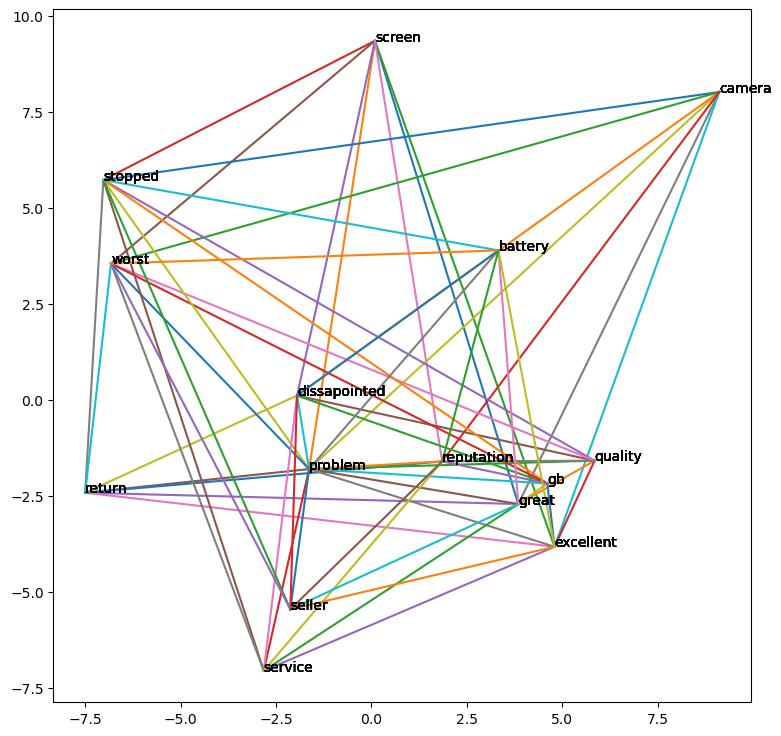

In [20]:
#some visualization of Word2Vec for apple phones


pairs = [('screen', 'great'),
('screen', 'problem'),
('screen', 'excellent'),
('screen', 'stopped'),
('screen', 'dissapointed'),
('screen', 'worst'),        
('screen', 'reputation'),
('camera', 'great'),         
('camera', 'problem'),
('camera', 'excellent'),
('camera', 'stopped'),
('camera', 'dissapointed'),
('camera', 'worst'),
('camera', 'reputation'),
('return', 'great'),         
('return', 'problem'),
('return', 'excellent'),
('return', 'stopped'),
('return', 'dissapointed'),
('return', 'worst'),
('return', 'reputation'),         
('quality', 'great'),         
('quality', 'problem'),
('quality', 'excellent'),
('quality', 'stopped'),
('quality', 'dissapointed'),
('quality', 'worst'),
('quality', 'reputation'),  
('gb', 'great'),         
('gb', 'problem'),
('gb', 'excellent'),
('gb', 'stopped'),
('gb', 'dissapointed'),
('gb', 'worst'),
('gb', 'reputation'),        
('problem', 'great'),         
('problem', 'problem'),
('problem', 'excellent'),
('problem', 'stopped'),
('problem', 'dissapointed'),
('problem', 'worst'),
('problem', 'reputation'),         
('service', 'great'),         
('service', 'problem'),
('service', 'excellent'),
('service', 'stopped'),
('service', 'dissapointed'),
('service', 'worst'),
('service', 'reputation'),         
('seller', 'great'),         
('seller', 'problem'),
('seller', 'excellent'),
('seller', 'stopped'),
('seller', 'dissapointed'),
('seller', 'worst'),
('seller', 'reputation'),           
('battery', 'great'),         
('battery', 'problem'),
('battery', 'excellent'),
('battery', 'stopped'),
('battery', 'dissapointed'),
('battery', 'worst'),
('battery', 'reputation')]     
n = np.shape(pairs)[0]

difference_matrix = np.array([model_apple.wv.get_vector(a[0])-model_apple.wv.get_vector(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model_apple.wv.get_vector(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(9,9))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show();


In [23]:
print("Apple - the term 'plastic' is connected to:")
model_apple.wv.most_similar("plastic")

#to notice for example_ no word "flimsy" to contrast to samsung

Apple - the term 'plastic' is connected to:


[('protective', 0.7041434645652771),
 ('wrap', 0.6992101073265076),
 ('film', 0.6605948805809021),
 ('case', 0.6579414010047913),
 ('cover', 0.6394786834716797),
 ('box', 0.6368170976638794),
 ('bubble', 0.6253092885017395),
 ('metal', 0.6238788366317749),
 ('coverings', 0.5950188040733337),
 ('wrapped', 0.5893043279647827)]

In [24]:
print("Apple -the term 'package' is connected to:")
model_apple.wv.most_similar("package")

Apple -the term 'package' is connected to:


[('wrapped', 0.6558278203010559),
 ('opened', 0.6325146555900574),
 ('wrap', 0.5855115652084351),
 ('envelope', 0.5646007657051086),
 ('included', 0.5438107848167419),
 ('weary', 0.5431187152862549),
 ('box', 0.5405809283256531),
 ('exstatic', 0.5306112766265869),
 ('smashed', 0.5297400951385498),
 ('boxed', 0.523418664932251)]

In [25]:
print("Apple - the word 'satisified' is connected to:" )
model_apple.wv.most_similar("satisfied")

Apple - the word 'satisified' is connected to:


[('dajs', 0.5663095712661743),
 ('described', 0.5429282784461975),
 ('delivery', 0.5192023515701294),
 ('merchant', 0.5173821449279785),
 ('phenomenal', 0.49823111295700073),
 ('recommend', 0.4877230226993561),
 ('satisfy', 0.480241596698761),
 ('purchase', 0.47743725776672363),
 ('discribed', 0.473900705575943),
 ('extremely', 0.47008267045021057)]

In [26]:
print("Apple - the word 'back' is connected to:")
model_apple.wv.most_similar("back")

Apple - the word 'back' is connected to:


[('send', 0.5726297497749329),
 ('turn', 0.5464314818382263),
 ('screen', 0.49259960651397705),
 ('stuck', 0.48746466636657715),
 ('cause', 0.47633683681488037),
 ('fix', 0.4743445813655853),
 ('cant', 0.469045490026474),
 ('couldnt', 0.4597695767879486),
 ('logo', 0.4485291540622711),
 ('eventually', 0.4470944404602051)]

[2.85523998e-01 1.47710102e-01 1.26122298e-01 9.13129497e-02
 7.74769542e-02 7.23026202e-02 4.98419937e-02 4.89443673e-02
 3.33972161e-02 2.64770505e-02 1.55269875e-02 1.42755602e-02
 5.85805056e-03 5.22985220e-03 2.77845531e-32 1.11740705e-32
 9.55879447e-33 7.55227911e-33 6.60183779e-33 5.76891805e-33
 5.02943950e-33 4.69481429e-33 3.29673209e-33 2.73475401e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33 1.68616250e-33
 1.68616250e-33 1.68616250e-33 1.68616250e-33]


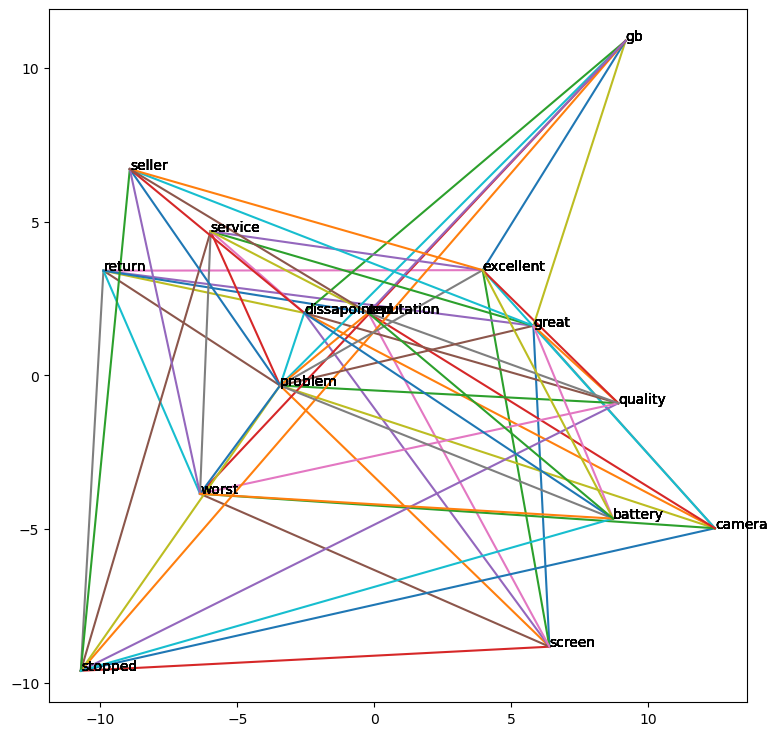

In [19]:
#visualization of Word2vec for Samsung phones

pairs = [('screen', 'great'),
('screen', 'problem'),
('screen', 'excellent'),
('screen', 'stopped'),
('screen', 'dissapointed'),
('screen', 'worst'),        
('screen', 'reputation'),
('camera', 'great'),         
('camera', 'problem'),
('camera', 'excellent'),
('camera', 'stopped'),
('camera', 'dissapointed'),
('camera', 'worst'),
('camera', 'reputation'),
('return', 'great'),         
('return', 'problem'),
('return', 'excellent'),
('return', 'stopped'),
('return', 'dissapointed'),
('return', 'worst'),
('return', 'reputation'),         
('quality', 'great'),         
('quality', 'problem'),
('quality', 'excellent'),
('quality', 'stopped'),
('quality', 'dissapointed'),
('quality', 'worst'),
('quality', 'reputation'),
('gb', 'great'),         
('gb', 'problem'),
('gb', 'excellent'),
('gb', 'stopped'),
('gb', 'dissapointed'),
('gb', 'worst'),
('gb', 'reputation'),             
('problem', 'great'),         
('problem', 'problem'),
('problem', 'excellent'),
('problem', 'stopped'),
('problem', 'dissapointed'),
('problem', 'worst'),
('problem', 'reputation'),         
('service', 'great'),         
('service', 'problem'),
('service', 'excellent'),
('service', 'stopped'),
('service', 'dissapointed'),
('service', 'worst'),
('service', 'reputation'),         
('seller', 'great'),         
('seller', 'problem'),
('seller', 'excellent'),
('seller', 'stopped'),
('seller', 'dissapointed'),
('seller', 'worst'),
('seller', 'reputation'),           
('battery', 'great'),         
('battery', 'problem'),
('battery', 'excellent'),
('battery', 'stopped'),
('battery', 'dissapointed'),
('battery', 'worst'),
('battery', 'reputation')]       
n = np.shape(pairs)[0]

difference_matrix = np.array([model_samsung.wv.get_vector(a[0])-model_samsung.wv.get_vector(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model_samsung.wv.get_vector(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(9,9))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show();


In [27]:
print("Samsung - the word 'plastc' is connected to:")
model_samsung.wv.most_similar("plastic")


Samsung - the word 'plastc' is connected to:


[('protective', 0.7630749940872192),
 ('cover', 0.7104869484901428),
 ('film', 0.7065759301185608),
 ('metal', 0.7028204798698425),
 ('tape', 0.7017055749893188),
 ('flimsy', 0.7013353109359741),
 ('material', 0.6950672268867493),
 ('casing', 0.6880056262016296),
 ('sides', 0.6875849366188049),
 ('layers', 0.6865872144699097)]

In [29]:
print("Samsung - the word 'package' is connected to:")
model_samsung.wv.most_similar("package")


Samsung - the word 'package' is connected to:


[('box', 0.7931624054908752),
 ('opened', 0.7221924662590027),
 ('sealed', 0.6848236918449402),
 ('packaging', 0.6818910241127014),
 ('seals', 0.6764997243881226),
 ('wrapped', 0.6710382699966431),
 ('contents', 0.6689700484275818),
 ('boxes', 0.6590947508811951),
 ('received', 0.6474114656448364),
 ('came', 0.645405113697052)]

In [30]:
print("Samsung -the word 'satisfied' is connected to:")
model_samsung.wv.most_similar("satisfied")

#we see word unbeatable in contrast to other phones

Samsung -the word 'satisfied' is connected to:


[('happy', 0.6849226951599121),
 ('pleased', 0.6267472505569458),
 ('sooner', 0.5756199955940247),
 ('delivering', 0.5300451517105103),
 ('excellent', 0.5296551585197449),
 ('skeptical', 0.5213565826416016),
 ('described', 0.51975017786026),
 ('transaction', 0.5150905251502991),
 ('weary', 0.501774251461029),
 ('unbeatable', 0.5000251531600952)]

In [31]:
print("Samsung -the word 'back' is connected to:")
model_samsung.wv.most_similar("back")


Samsung -the word 'back' is connected to:


[('cover', 0.5460653305053711),
 ('burnt', 0.5403285622596741),
 ('sit', 0.5247921347618103),
 ('resulted', 0.5162386298179626),
 ('defective', 0.5159610509872437),
 ('try', 0.5154213309288025),
 ('wipe', 0.5067750215530396),
 ('repeatedly', 0.5039854645729065),
 ('pressed', 0.5031295418739319),
 ('pushing', 0.4981065094470978)]

[2.87178798e-01 1.41169026e-01 1.26107538e-01 9.32129523e-02
 7.93042178e-02 5.57635528e-02 5.04206584e-02 4.73137628e-02
 3.22982503e-02 2.74070734e-02 2.36741893e-02 1.44475983e-02
 1.08725545e-02 7.18797404e-03 3.64185485e-03 1.35316575e-32
 9.12678456e-33 8.36877282e-33 5.12929486e-33 3.38875610e-33
 3.33884791e-33 3.16475505e-33 2.15588065e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.05116624e-33 1.05116624e-33 1.05116624e-33
 1.05116624e-33 1.051166

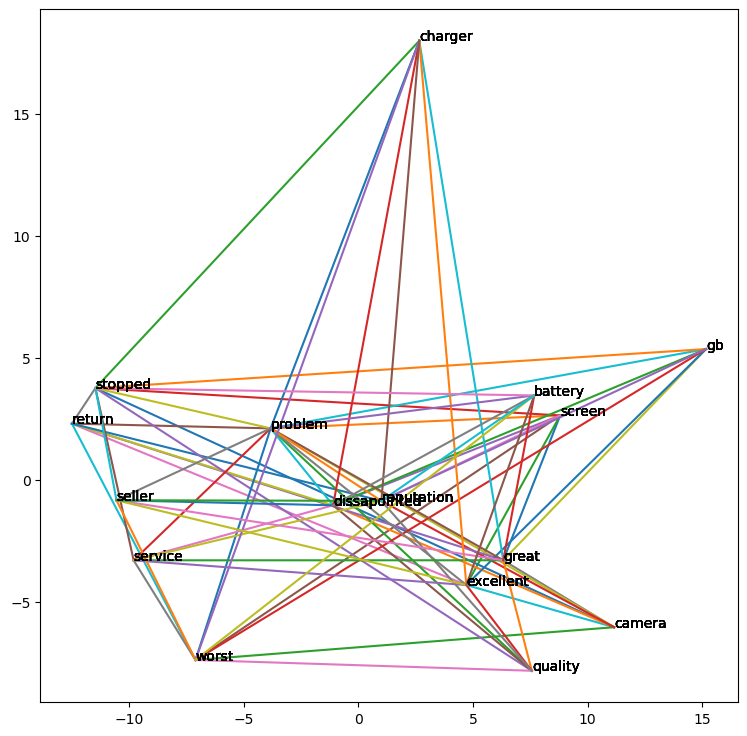

In [32]:
#some visualization for Blu phones


pairs = [('screen', 'great'),
('screen', 'problem'),
('screen', 'excellent'),
('screen', 'stopped'),
('screen', 'dissapointed'),
('screen', 'worst'),        
('screen', 'reputation'),
('camera', 'great'),         
('camera', 'problem'),
('camera', 'excellent'),
('camera', 'stopped'),
('camera', 'dissapointed'),
('camera', 'worst'),
('camera', 'reputation'),
('return', 'great'),         
('return', 'problem'),
('return', 'excellent'),
('return', 'stopped'),
('return', 'dissapointed'),
('return', 'worst'),
('return', 'reputation'),         
('quality', 'great'),         
('quality', 'problem'),
('quality', 'excellent'),
('quality', 'stopped'),
('quality', 'dissapointed'),
('quality', 'worst'),
('quality', 'reputation'),  
('gb', 'great'),         
('gb', 'problem'),
('gb', 'excellent'),
('gb', 'stopped'),
('gb', 'dissapointed'),
('gb', 'worst'),
('gb', 'reputation'),        
('problem', 'great'),         
('problem', 'problem'),
('problem', 'excellent'),
('problem', 'stopped'),
('problem', 'dissapointed'),
('problem', 'worst'),
('problem', 'reputation'),         
('service', 'great'),         
('service', 'problem'),
('service', 'excellent'),
('service', 'stopped'),
('service', 'dissapointed'),
('service', 'worst'),
('service', 'reputation'), 
('charger', 'great'),         
('charger', 'problem'),
('charger', 'excellent'),
('charger', 'stopped'),
('charger', 'dissapointed'),
('charger', 'worst'),
('charger', 'reputation'),           
('seller', 'great'),         
('seller', 'problem'),
('seller', 'excellent'),
('seller', 'stopped'),
('seller', 'dissapointed'),
('seller', 'worst'),
('seller', 'reputation'),           
('battery', 'great'),         
('battery', 'problem'),
('battery', 'excellent'),
('battery', 'stopped'),
('battery', 'dissapointed'),
('battery', 'worst'),
('battery', 'reputation')]     
n = np.shape(pairs)[0]

difference_matrix = np.array([model_blu.wv.get_vector(a[0])-model_blu.wv.get_vector(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model_blu.wv.get_vector(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(9,9))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show();


In [33]:
print("Blu -the word 'plastic' is connected to:")
model_blu.wv.most_similar("plastic")

Blu -the word 'plastic' is connected to:


[('slippery', 0.8216497898101807),
 ('body', 0.762015163898468),
 ('aluminum', 0.753682017326355),
 ('metal', 0.7534266114234924),
 ('cover', 0.7478956580162048),
 ('flimsy', 0.7132795453071594),
 ('rubber', 0.7073878049850464),
 ('rubbery', 0.696261465549469),
 ('case', 0.6924673318862915),
 ('grip', 0.6844736933708191)]

In [34]:
print("Blu - the word 'package' is conntected to:")
model_blu.wv.most_similar("package")

Blu - the word 'package' is conntected to:


[('came', 0.6510289311408997),
 ('box', 0.6485055088996887),
 ('packaging', 0.6438837647438049),
 ('arrived', 0.6233247518539429),
 ('opened', 0.608279824256897),
 ('afternoon', 0.5848281979560852),
 ('seals', 0.5639790892601013),
 ('youuu', 0.5344104170799255),
 ('protectorat', 0.5297605991363525),
 ('xtremly', 0.5182928442955017)]

In [35]:
print("Blu - the word 'satisfied' is connected to:")
model_blu.wv.most_similar("satisfied")

Blu - the word 'satisfied' is connected to:


[('yasss', 0.6164584755897522),
 ('happy', 0.5593437552452087),
 ('excellent', 0.5208951830863953),
 ('pleased', 0.5133107304573059),
 ('wright', 0.5044882297515869),
 ('dealfisher', 0.5039151906967163),
 ('recommendable', 0.49746230244636536),
 ('discounted', 0.49591192603111267),
 ('exelent', 0.489725798368454),
 ('troublingfor', 0.48261868953704834)]

In [36]:
print("Blu - the word 'back' is connectted to:")
model_blu.wv.most_similar("back")

Blu - the word 'back' is connectted to:


[('pry', 0.5673097968101501),
 ('sent', 0.5263418555259705),
 ('corner', 0.5085011720657349),
 ('wipe', 0.47869136929512024),
 ('sticker', 0.46843087673187256),
 ('placed', 0.4647931158542633),
 ('located', 0.46379581093788147),
 ('button', 0.462564080953598),
 ('compartment', 0.4552106559276581),
 ('responding', 0.45053038001060486)]

#### Like this you can choose only negative or positive reviews, other brands, or maybe only expensive, and
#analize with PCA visualization the distance between the words#
#and using the parameter 'most_similar' one can get the information about the problems or about successes